# Pretesting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# preprocessing
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

# metrics
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from scipy import stats

# models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor

In [2]:
data = pd.read_csv('train.csv', index_col='id')

In [3]:
X = data.drop(axis=1, columns=['target'])
y = data[['target']]

## Colinearity X.drop(axis=1, columns=['f1', 'f2', 'f3', 'f4', 'f5'], inplace=True)

In [8]:
for i in X:
    rest = X.drop(axis=1, columns=[i])
    for j in rest:
        # plt.scatter(X[[j]], X[[i]])
        lr = LinearRegression()
        lr.fit(X[[i]], X[[j]])
        pred = lr.predict(X[[i]])
        r2 = round(r2_score(X[[j]], pred), 3)
        if r2 > 0.3:
            print(i + j)
        # plt.title(i + j + ' r2: ' + str(r2))
        # plt.show()

In [7]:
X.drop(axis=1, columns=['f1', 'f2', 'f3', 'f4', 'f5'], inplace=True)

### Distributions

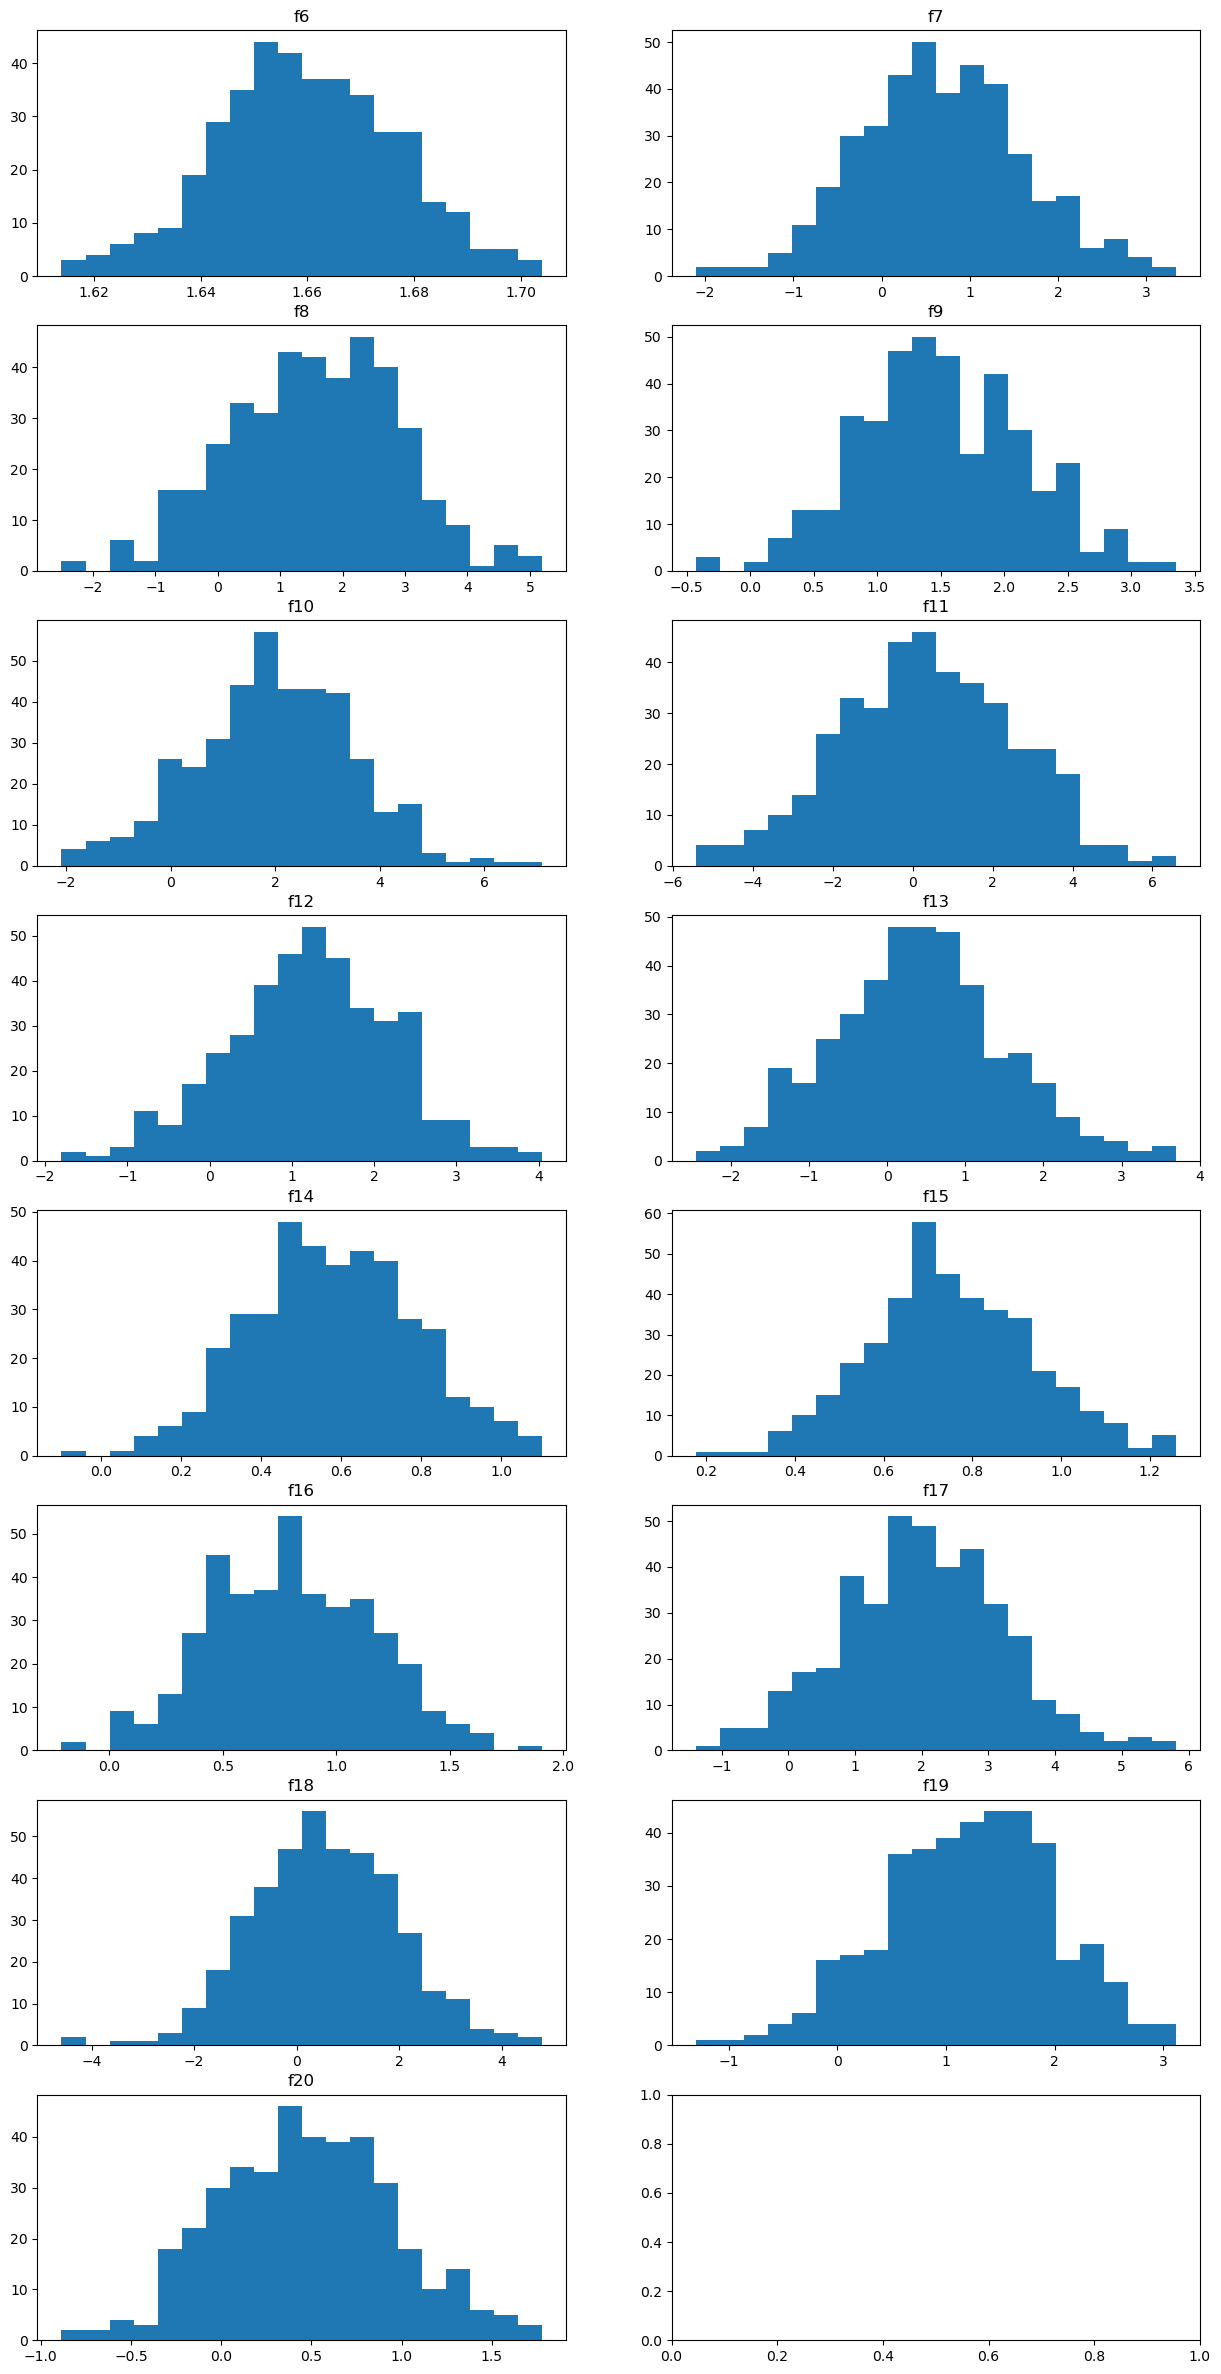

In [9]:
fig, ax = plt.subplots(8, 2, figsize=(15, 30))
count = 0
for i in X:
    ax[count//2][count%2].hist(data[i], bins=20)
    ax[count//2][count%2].set_title(i)
    count += 1

### Relationship Between Target and Each Variable

In [4]:
X = X[['f1', 'f3', 'f4', 'f5']]

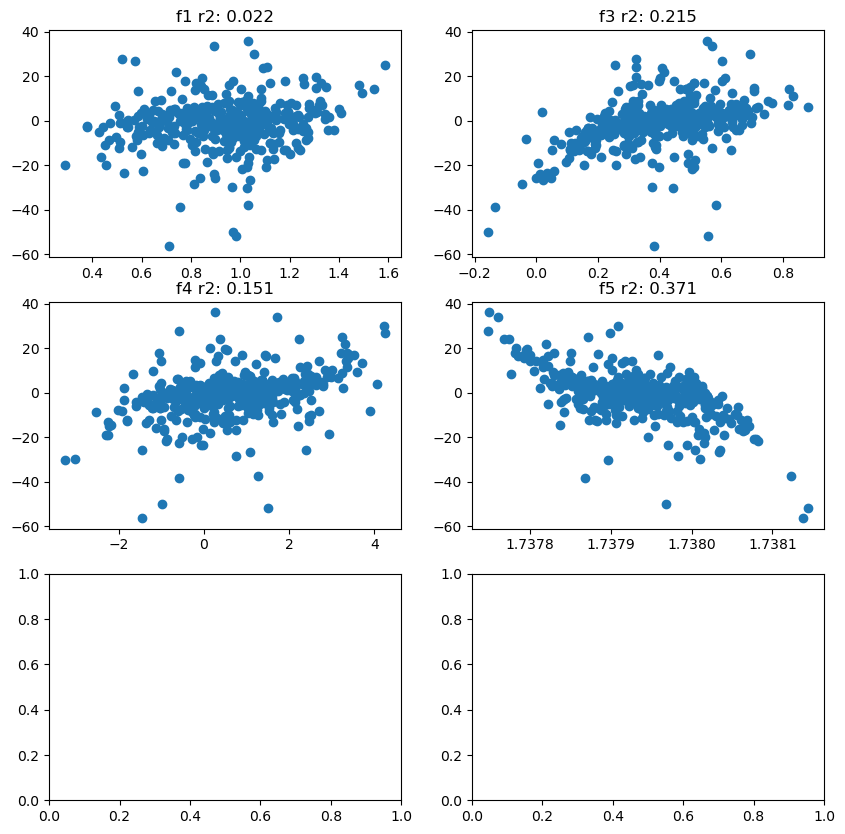

In [5]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
count = 0
for i in X:
    ax[count//2][count%2].scatter(X[[i]], y)
    lr = LinearRegression()
    lr.fit(X[[i]], y)
    pred = lr.predict(X[[i]])
    r2 = round(r2_score(y, pred), 3)
    ax[count//2][count%2].set_title(i + ' r2: ' + str(r2))
    count += 1

In [6]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     267.2
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          6.49e-111
Time:                        16:50:31   Log-Likelihood:                -1258.7
No. Observations:                 400   AIC:                             2527.
Df Residuals:                     395   BIC:                             2547.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.584e+05   7131.416     22.209      0.0

In [11]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     56.29
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           4.16e-87
Time:                        11:15:32   Log-Likelihood:                -1288.1
No. Observations:                 400   AIC:                             2608.
Df Residuals:                     384   BIC:                             2672.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.8599     30.832      2.136      0.0

* **Consider ONLY keeping: 6, 8, 9, 10**